In [1]:
source("/home/users/mcbitter/OrchardProject/Code/config.R")
source("/home/users/mcbitter/OrchardProject/Code/helper_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/load_packages.R")
source("/home/users/mcbitter/OrchardProject/Code/plotting_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/workflow_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/general_cage_functions.R")
setwd('/scratch/groups/dpetrov/MarkB/Orchard2021Data/RData/Downsampled/')

In [2]:
###Running PCA - for both 2021 samples, and 2021/2014 samples

In [3]:
####PCA plotting functions

plot_pca_tpt = function(df, samps){
    ggplot(pca_data, aes(x = PC1, y = PC2, color = Timepoint)) +
        geom_point(size = 5) +
        xlab(paste0("PC1 (", round(summary(pca_res)$importance[2,1] * 100, 2), " % expl. var.)")) +
        ylab(paste0("PC2 (", round(summary(pca_res)$importance[2,2] * 100, 2), " % expl. var.)")) +
        scale_color_gradient(low = "red", high = "blue") +
        theme_bw(base_size = 15) 
}


plot_pca_tpt_chr = function(df, samps){
    ggplot(pca_data, aes(x = PC1, y = PC2, color = Timepoint)) +
        geom_point(size = 5) +
        xlab(paste0("PC1 (", round(summary(pca_res)$importance[2,1] * 100, 2), " % expl. var.)")) +
        ylab(paste0("PC2 (", round(summary(pca_res)$importance[2,2] * 100, 2), " % expl. var.)")) +
        ggtitle(chr) +
        scale_color_gradient(low = "red", high = "blue") +
        theme_bw(base_size = 15) 
}


In [4]:
load('./orch2021_Downsampled_ECage_Filtered.RData')
sites %>% group_by(chrom) %>% count()

chrom,n
<chr>,<int>
2L,453445
2R,373755
3L,445457
3R,448008
X,254497


In [2]:
#Plot all E cage samples through time 
load('./orch2021_Downsampled_ECage_Filtered.RData')
df = afmat
samps = samps %>% rename(Timepoint = tpt)
pca_res <- prcomp(na.omit(t(df)), scale = TRUE, center = TRUE)
pca_data <- as.data.frame(pca_res$x)
pca_data <- cbind(samps, pca_data)
pca_data$Timepoint = as.numeric(pca_data$Timepoint)
write.csv(pca_data , '../../PCA/pca.ecage.csv' , row.names = FALSE)


Saving 6.67 x 6.67 in image


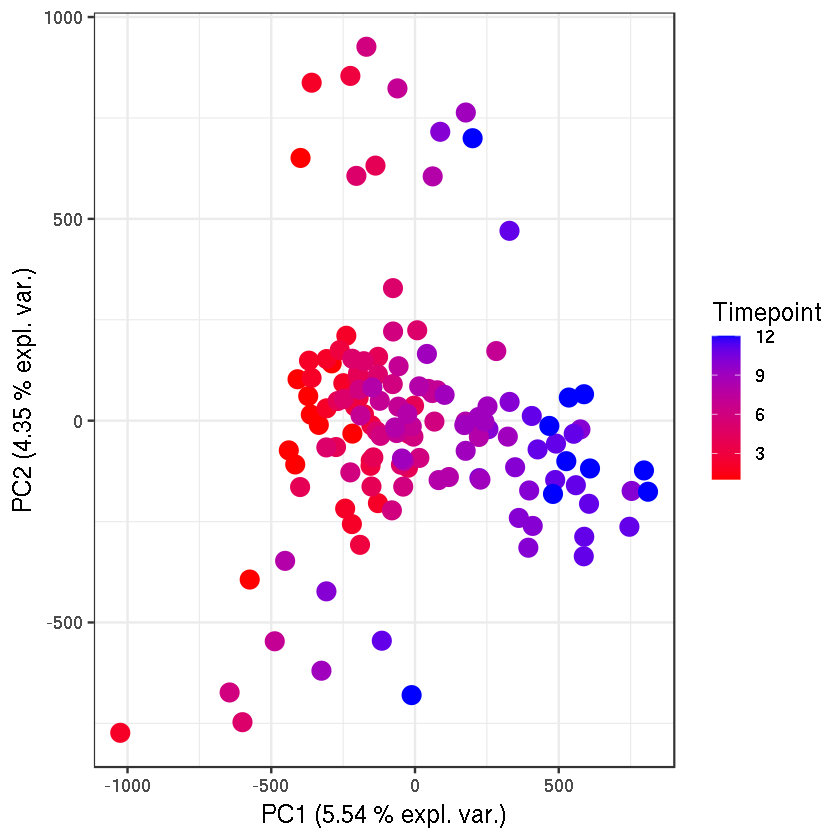

In [9]:
#Plot and color by collection time
p = plot_pca_tpt(df, samps)
ggsave('../../Figures/PCA/pca.AllTP.ecage.orch21.pdf', p)
p

In [6]:
#Plot through time and color by replicate cage

pca_data = pca_data %>% separate(cage, into = c(NA, 'Replicate'), sep = 'E')
pca_data$Replicate = factor(pca_data$Replicate, levels = c('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))


pca_data = pca_data %>% mutate(c = case_when(Replicate == '1' ~  '#E68613',
                                         Replicate == '2' ~  '#CD9600',
                                         Replicate == '3' ~  '#ABA300',
                                         Replicate == '4' ~  '#7CAE00',
                                         Replicate == '5' ~  '#0CB702',
                                         Replicate == '6' ~  '#00BE67',
                                         Replicate == '7' ~  '#00C19A',
                                         Replicate == '8' ~  '#8494FF',
                                         Replicate == '9' ~  '#C77CFF',
                                         Replicate == '10' ~  '#ED68ED',
                                         Replicate == '11' ~  '#FF61CC',
                                         Replicate == '12' ~  '#FF68A1'))

Saving 6.67 x 6.67 in image


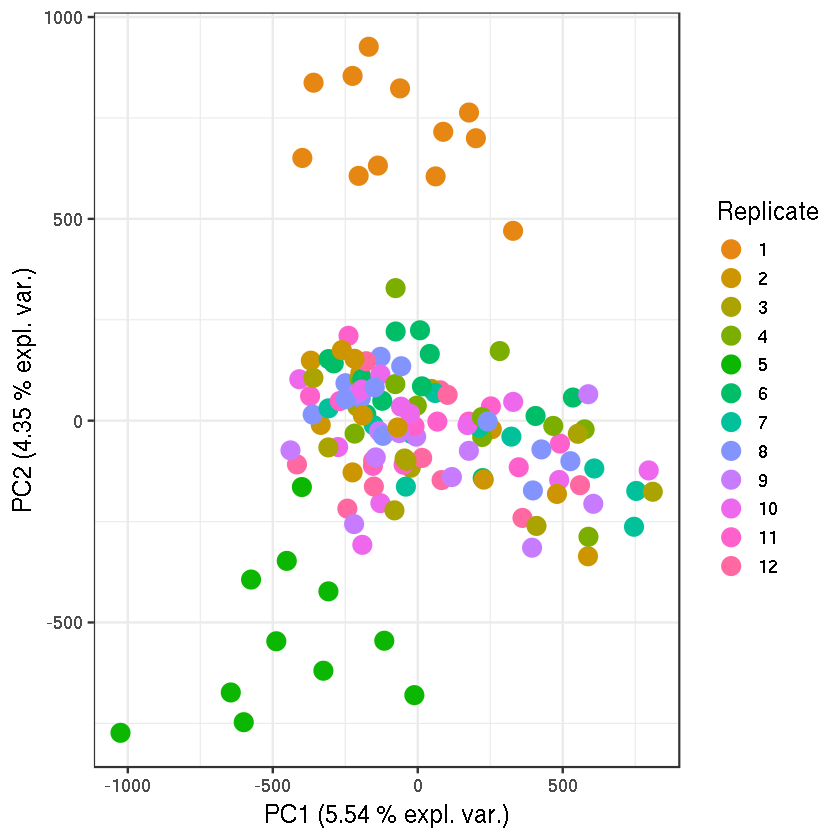

In [9]:
p.c = ggplot(pca_data, aes(x = PC1, y = PC2, colour = Replicate)) +
        geom_point(size = 5) +
          scale_color_manual(values = c('#E68613','#CD9600', '#ABA300', '#7CAE00','#0CB702','#00BE67','#00C19A', '#8494FF','#C77CFF', '#ED68ED','#FF61CC','#FF68A1'))+
  # Use scale_color_manual to specify custom colors
        xlab(paste0("PC1 (", round(summary(pca_res)$importance[2,1] * 100, 2), " % expl. var.)")) +
        ylab(paste0("PC2 (", round(summary(pca_res)$importance[2,2] * 100, 2), " % expl. var.)")) +
        #scale_color_gradient(low = "red", high = "blue") +
        theme_bw(base_size = 15) 
p.c
ggsave('../../Figures/PCA/pca.AllTP.ecage.orch21.ColorByCage.pdf', p.c)

In [5]:
#PCA By Chromosome - just get results and save

#chroms = c("2L")
chroms = c("2L", "2R", "3L", '3R', 'X')
d.meta = data.frame()
for (chr in chroms){
    load('./orch2021_Downsampled_ECage_Filtered.RData')
    df = cbind(sites, afmat)
    df = df %>%
        filter(chrom == chr)
    df = df[,-c(1:2)]
    samps = samps %>% rename(Timepoint = tpt)
    pca_res <- prcomp(na.omit(t(df)), scale = TRUE, center = TRUE)
    pca_data <- as.data.frame(pca_res$x)
    pca_data <- cbind(samps, pca_data)
    pc1.var.expl = round(summary(pca_res)$importance[2,1] * 100, 2)
    pc2.var.expl = round(summary(pca_res)$importance[2,2] * 100, 2)
    pca_data$Timepoint = as.numeric(pca_data$Timepoint)
    pca_data$Chrom = chr
    pca_data$PC1.VarExpl = pc1.var.expl
    pca_data$PC2.VarExpl = pc2.var.expl
    d.meta = rbind(d.meta, pca_data)
}
write.csv(d.meta , '../../Figures/PCA/pca.ecage.ByChrom.csv' , row.names = FALSE)


In [8]:
unique((d.meta %>% filter(Chrom == '2L'))$PC1.VarExpl)
unique((d.meta %>% filter(Chrom == '2L'))$PC2.VarExpl)
unique((d.meta %>% filter(Chrom == '2R'))$PC1.VarExpl)
unique((d.meta %>% filter(Chrom == '2R'))$PC2.VarExpl)
unique((d.meta %>% filter(Chrom == '3L'))$PC1.VarExpl)
unique((d.meta %>% filter(Chrom == '3L'))$PC2.VarExpl)
unique((d.meta %>% filter(Chrom == '3R'))$PC1.VarExpl)
unique((d.meta %>% filter(Chrom == '3R'))$PC2.VarExpl)
unique((d.meta %>% filter(Chrom == 'X'))$PC1.VarExpl)
unique((d.meta %>% filter(Chrom == 'X'))$PC2.VarExpl)

[1] 7.12

[1] 6.33

[1] 5.91

[1] 5.04

[1] 7.75

[1] 5.6

[1] 7.42

[1] 5.82

[1] 6.71

[1] 5.29

Saving 6.67 x 6.67 in image


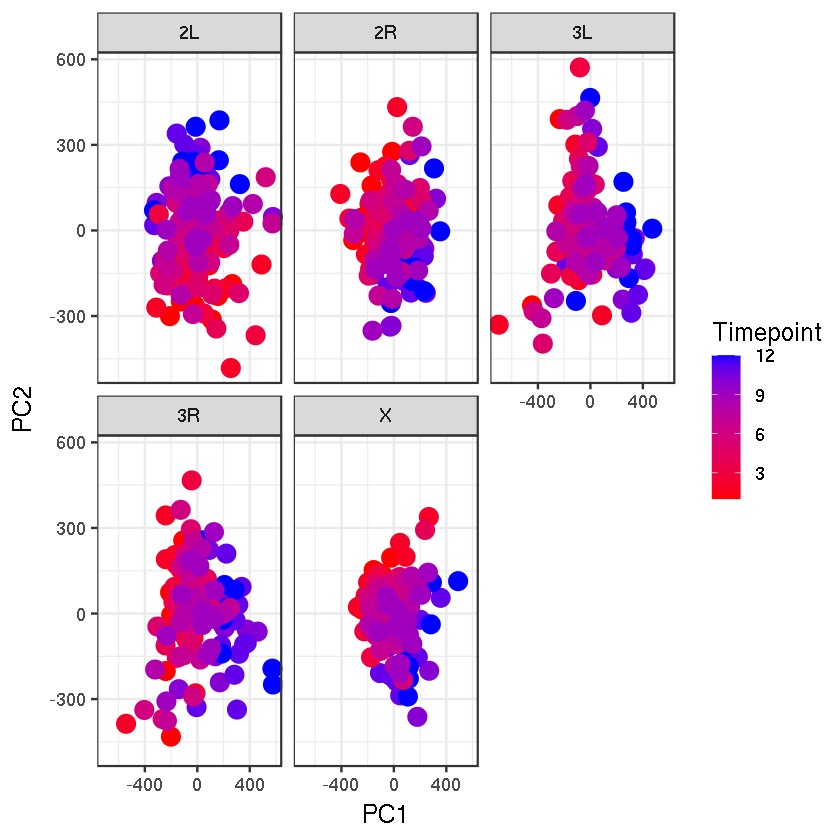

In [13]:
#Plot PCA by chromosome
p.chrom = ggplot(d.meta, aes(x = PC1, y = PC2, color = Timepoint)) +
        geom_point(size = 5) +
        #xlab(paste0("PC1 (", round(summary(pca_res)$importance[2,1] * 100, 2), " % expl. var.)")) +
        #ylab(paste0("PC2 (", round(summary(pca_res)$importance[2,2] * 100, 2), " % expl. var.)")) +
        scale_color_gradient(low = "red", high = "blue") +
        theme_bw(base_size = 15)  +
        facet_wrap(~Chrom)
ggsave('../../Figures/PCA/pca.AllTP.ByChrom.pdf', p.chrom)
p.chrom

In [12]:
#Another way of plotting with PC1/PC2 variance explained
p.2L = ggplot((d.meta %>% filter(Chrom == '2L')), aes(x = PC1, y = PC2, color = Timepoint)) +
        geom_point(size = 5) +
        xlab(paste0((as.character(unique((d.meta %>% filter(Chrom == '2L'))$PC1.VarExpl))), " % expl. var.)")) +
        ylab(paste0((as.character(unique((d.meta %>% filter(Chrom == '2L'))$PC2.VarExpl))), " % expl. var.)")) +
        scale_color_gradient(low = "red", high = "blue") +
        theme_bw(base_size = 15)  +
        facet_wrap(~Chrom)
p.2R = ggplot((d.meta %>% filter(Chrom == '2R')), aes(x = PC1, y = PC2, color = Timepoint)) +
        geom_point(size = 5) +
        xlab(paste0((as.character(unique((d.meta %>% filter(Chrom == '2R'))$PC1.VarExpl))), " % expl. var.)")) +
        ylab(paste0((as.character(unique((d.meta %>% filter(Chrom == '2R'))$PC2.VarExpl))), " % expl. var.)")) +
        scale_color_gradient(low = "red", high = "blue") +
        theme_bw(base_size = 15)  +
        facet_wrap(~Chrom)
p.3L = ggplot((d.meta %>% filter(Chrom == '3L')), aes(x = PC1, y = PC2, color = Timepoint)) +
        geom_point(size = 5) +
        xlab(paste0((as.character(unique((d.meta %>% filter(Chrom == '3L'))$PC1.VarExpl))), " % expl. var.)")) +
        ylab(paste0((as.character(unique((d.meta %>% filter(Chrom == '3L'))$PC2.VarExpl))), " % expl. var.)")) +
        scale_color_gradient(low = "red", high = "blue") +
        theme_bw(base_size = 15)  +
        facet_wrap(~Chrom)
p.3R = ggplot((d.meta %>% filter(Chrom == '3R')), aes(x = PC1, y = PC2, color = Timepoint)) +
        geom_point(size = 5) +
        xlab(paste0((as.character(unique((d.meta %>% filter(Chrom == '3R'))$PC1.VarExpl))), " % expl. var.)")) +
        ylab(paste0((as.character(unique((d.meta %>% filter(Chrom == '3R'))$PC2.VarExpl))), " % expl. var.)")) +
        scale_color_gradient(low = "red", high = "blue") +
        theme_bw(base_size = 15)  +
        facet_wrap(~Chrom)

p.X = ggplot((d.meta %>% filter(Chrom == 'X')), aes(x = PC1, y = PC2, color = Timepoint)) +
        geom_point(size = 5) +
        xlab(paste0((as.character(unique((d.meta %>% filter(Chrom == 'X'))$PC1.VarExpl))), " % expl. var.)")) +
        ylab(paste0((as.character(unique((d.meta %>% filter(Chrom == 'X'))$PC2.VarExpl))), " % expl. var.)")) +
        scale_color_gradient(low = "red", high = "blue") +
        theme_bw(base_size = 15)  +
        facet_wrap(~Chrom)

# Analysis of PCA with K-Means

In [43]:
##K-means clustering analysis
setwd('~/dpetrov/MarkB/Orchard2021Data/PCA/')
df = read.csv('./pca.ecage.csv')

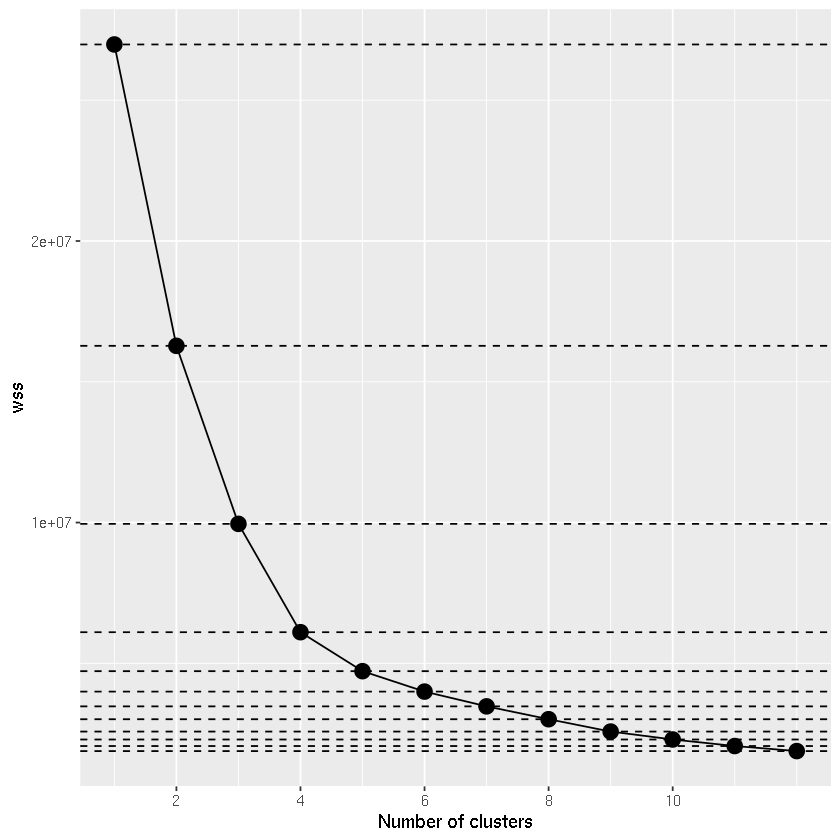

In [44]:
# Decide how many clusters to look at
df.pc = df %>% dplyr::select(PC1, PC2)
n_clusters <- 12
# Initialize total within sum of squares error: wss
wss <- numeric(n_clusters)

set.seed(123)

# Look over 1 to n possible clusters
for (i in (1:n_clusters)) {
  # Fit the model: km.out
  km.out <- kmeans(df.pc, centers = i, nstart = 20)
  # Save the within cluster sum of squares
  wss[i] <- km.out$tot.withinss
}

# Produce a scree plot
wss_df <- tibble(clusters = 1:n_clusters, wss = wss)
 
scree_plot <- ggplot(wss_df, aes(x = clusters, y = wss, group = 1)) +
    geom_point(size = 4)+
    geom_line() +
    scale_x_continuous(breaks = c(2, 4, 6, 8, 10)) +
    xlab('Number of clusters') +
    geom_hline(
        yintercept = wss, 
        linetype = 'dashed') 
scree_plot

In [52]:
#K means results over range of clusters starting at potentially most 'likely'
ks <- c(4:14)
set.seed(123)
# Build model with k clusters: km.out
d.meta = data.frame()
for (k in ks){
    set.seed(123)
    # Build model with k clusters: km.out
    km.out <- kmeans(df.pc, centers = k, nstart = 20)
    df.pc.k = df.pc %>% mutate(cluster_id = factor(km.out$cluster)) 
    df.pc.k$K = k
    df.pc.k = cbind((df %>% dplyr::select(sample,cage,  Timepoint)), df.pc.k)
    d.meta = rbind(d.meta, df.pc.k)
}


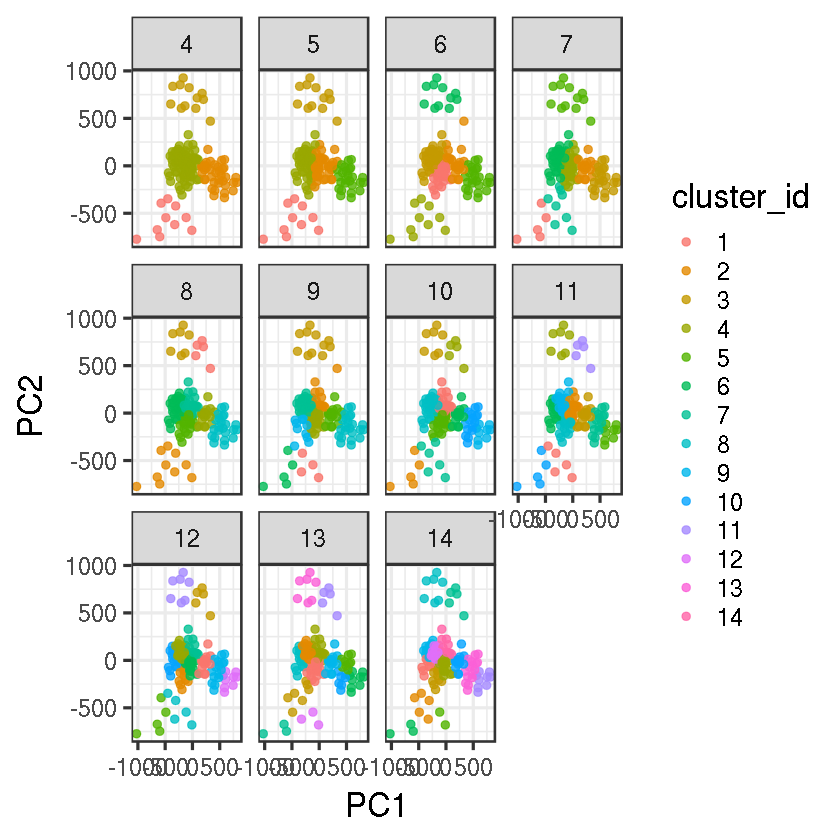

In [53]:
##plot all k's 

p = ggplot(as.data.frame(d.meta), aes(PC1, PC2, color = cluster_id)) +
    geom_point(alpha = 0.8, size = 2) +
    xlab("PC1") +
    ylab("PC2") +
    theme_bw(base_size = 20) +
    facet_wrap(~K)
ggsave('../Figures/PCA/kmeans.all.pdf', p , height = 10, width = 20)
p

In [57]:
d.meta = d.meta %>% separate(cage, into = c(NA, 'Replicate'), sep = 'E')

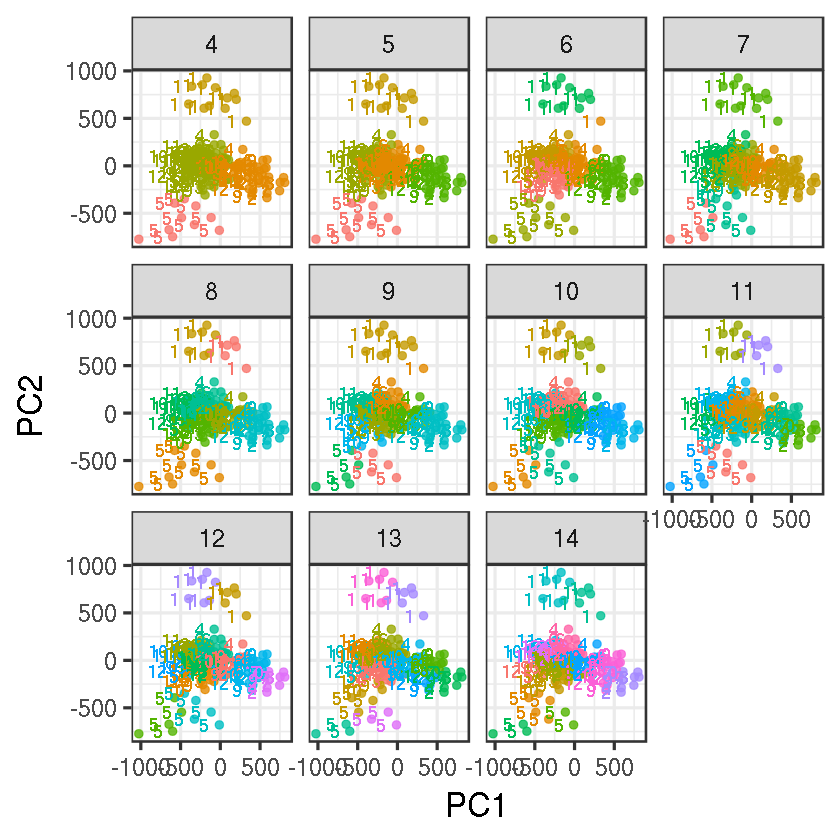

In [62]:
##plot all k's - with cage label
p = ggplot(as.data.frame(d.meta), aes(PC1, PC2, color = cluster_id, label = Replicate)) +
    geom_point(alpha = 0.8, size = 2) +
    geom_text(hjust = 2) +
    xlab("PC1") +
    ylab("PC2") +
    theme_bw(base_size = 20) +
    theme(legend.position = "none") + 
    facet_wrap(~K)
ggsave('../Figures/PCA/kmeans.all.CageLabels.pdf', p , height = 10, width = 20)
p

In [30]:
d.meta %>% filter(K == '5' & !cage %in% c('E1', 'E5')) %>% 
    group_by(cluster_id) %>% summarise(min.tp = min(Timepoint), 
                                      max.tp = max(Timepoint))

cluster_id,min.tp,max.tp
<fct>,<int>,<int>
2,4,10
4,1,8
5,9,12


In [31]:
#Regression of samples on PC1 and PC2
#All samples simultaneously 
summary(lm(formula = PC1 ~ Timepoint, data = df))
##p-value: < 2.2e-16

summary(lm(formula = PC2 ~ Timepoint, data = df))
##p-value: 0.0008531


Call:
lm(formula = PC1 ~ Timepoint, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-666.02  -76.34   39.75  107.18  477.72 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -517.947     35.766  -14.48   <2e-16 ***
Timepoint     79.377      4.869   16.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 193.7 on 137 degrees of freedom
Multiple R-squared:  0.6599,	Adjusted R-squared:  0.6574 
F-statistic: 265.8 on 1 and 137 DF,  p-value: < 2.2e-16



Call:
lm(formula = PC2 ~ Timepoint, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-835.07 -125.48   -9.44   82.31  919.19 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   89.033     53.672   1.659   0.0994 .
Timepoint    -13.645      7.306  -1.868   0.0640 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 290.7 on 137 degrees of freedom
Multiple R-squared:  0.02483,	Adjusted R-squared:  0.01771 
F-statistic: 3.488 on 1 and 137 DF,  p-value: 0.06397


# 2014 + 2021 PCA

In [36]:
#Plot all E cage samples through time - Scores

load('./orch2021_orch14_ECage.RData')  #combined allele frequency data from 2014 and 2021
df = afmat
samps = samps %>% rename(ExperimentalDay = exp.day)
pca_res <- prcomp(na.omit(t(df)), scale = TRUE, center = TRUE)
pca_data <- as.data.frame(pca_res$x)
pca_data <- cbind(samps, pca_data)
pca_data$ExperimentalDay = as.numeric(pca_data$ExperimentalDay)




In [43]:
p.crossyear = ggplot(pca_data, aes(x = PC1, y = PC2, color = ExperimentalDay, shape = Year)) +
        geom_point(size = 5) +
        xlab(paste0("PC1 (", round(summary(pca_res)$importance[2,1] * 100, 2), " % expl. var.)")) +
        ylab(paste0("PC2 (", round(summary(pca_res)$importance[2,2] * 100, 2), " % expl. var.)")) +
        scale_color_gradient(low = "red", high = "blue") +
        theme_bw(base_size = 15) 

In [38]:
#RE-do above with standardized time points
samps = samps %>% mutate(tpt.std = 
                        case_when((Year == '2021') ~ tpt,
                                 (Year == '2014' & tpt == '1') ~ "1", 
                                 (Year == '2014' & tpt == '2') ~ "4", 
                                 (Year == '2014' & tpt == '3') ~ "7", 
                                 (Year == '2014' & tpt == '4') ~ "10", 
                                 (Year == '2014' & tpt == '5') ~ "11"))

In [39]:
pca_data = pca_data[,-(1:6)]
pca_data = cbind(samps, pca_data) 
pca_data = pca_data %>% rename(Timepoint = tpt)
pca_data$Timepoint = as.numeric(pca_data$Timepoint)


In [40]:
p.crossyear = ggplot(pca_data, aes(x = PC1, y = PC2, color = Timepoint, shape = Year, label = Timepoint)) +
        geom_point(size = 5) +
        geom_text(hjust=0.005, vjust=0.005) +
        xlab(paste0("PC1 (", round(summary(pca_res)$importance[2,1] * 100, 2), " % expl. var.)")) +
        ylab(paste0("PC2 (", round(summary(pca_res)$importance[2,2] * 100, 2), " % expl. var.)")) +
        scale_color_gradient(low = "red", high = "blue") +
        theme_bw(base_size = 15) 


In [44]:
ggsave('../Figures/PCA/2014.2021.Comp.pca.pdf', p.crossyear , height = 10, width = 10)

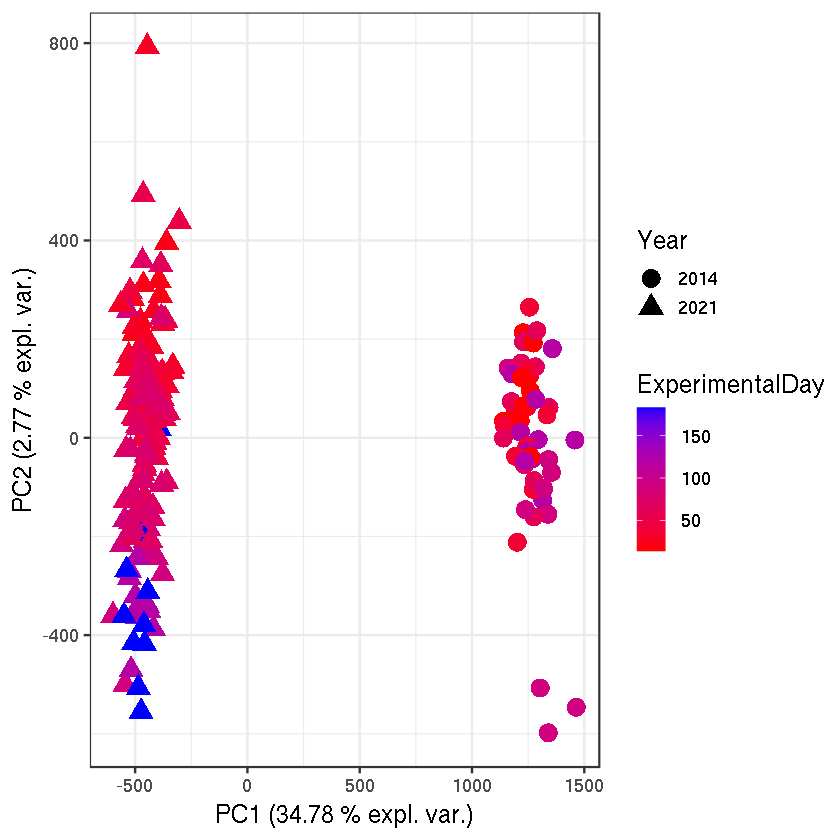

In [45]:
p.crossyear